# Solution for The Time Independent Schrodinger Equation using Split-Step Fourier Method

This code uses the split-step Fourier method to evolve the wavefunction in both position and momentum space, avoiding the need to solve a matrix equation.

Importing Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Determining Constants

In [10]:
h_bar = 1.0  # Reduced Planck's constant
m = 1.0      # Particle mass
L = 10.0     # Size of the spatial domain
N = 100      # Number of spatial grid points
dx = L / N   # Spatial step size
dt = 0.001   # Time step size
T = 0.1      # Total simulation time
num_steps = int(T / dt)  # Number of time steps

Now let's create a spatial grid.

In [10]:
x = np.linspace(0, L, N)

Initializing the equation with initial conditions at t = 0.

In [14]:
Psi = np.exp(-(x - L/2)**2 / 2) * np.exp(1j * x)

Time evolution using a split-step Fourier method

In [15]:
for step in range(num_steps):
    # Performing half-step in momentum space (Fourier transform)
    Psi_hat = np.fft.fft(Psi)
    k = np.fft.fftfreq(N, dx)
    Psi_hat *= np.exp(-1j * k**2 * h_bar * dt / (2 * m))

    # Performing full step in position space (inverse Fourier transform)
    Psi = np.fft.ifft(Psi_hat)

Finally Plotting the final wavefunction

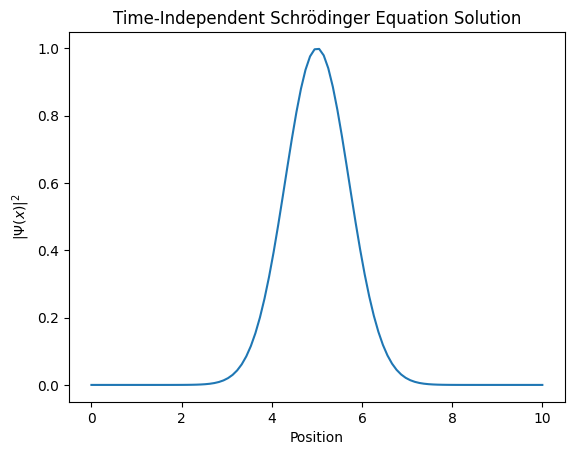

In [17]:
plt.plot(x, np.abs(Psi)**2)
plt.xlabel('Position')
plt.ylabel('$|\Psi(x)|^2$')
plt.title('Time-Independent Schrödinger Equation Solution')
plt.show()